In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

In [73]:

data = pd.read_csv('NKE.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [74]:
# Extract the 'Close' prices (target variable)
close_prices = data['Close'].values.reshape(-1, 1)


In [75]:
# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_normalized = scaler.fit_transform(close_prices)

In [76]:
#create sequences for input to LSTM
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [77]:
# Create sequences with a specified sequence length
sequence_length = 10
X, y = create_sequences(close_prices_normalized, sequence_length)

In [78]:
# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_valid = X[:split_index], X[split_index:]
y_train, y_valid = y[:split_index], y[split_index:]

In [79]:
#LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [80]:
# Train
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/300
13/13 [==============================] - 6s 94ms/step - loss: 0.0857 - val_loss: 0.0291
Epoch 2/300
13/13 [==============================] - 0s 21ms/step - loss: 0.0153 - val_loss: 0.0022
Epoch 3/300
13/13 [==============================] - 0s 17ms/step - loss: 0.0084 - val_loss: 0.0073
Epoch 4/300
13/13 [==============================] - 0s 18ms/step - loss: 0.0050 - val_loss: 0.0022
Epoch 5/300
13/13 [==============================] - 0s 19ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 6/300
13/13 [==============================] - 0s 18ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 7/300
13/13 [==============================] - 0s 19ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 8/300
13/13 [==============================] - 0s 18ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 9/300
13/13 [==============================] - 0s 19ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 10/300
13/13 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 0.0014

In [81]:
# Make predictions on the validation set
predictions_normalized = model.predict(X_valid)
predictions = scaler.inverse_transform(predictions_normalized)
actual_prices = scaler.inverse_transform(y_valid.reshape(-1, 1))

4/4 [==============================] - 1s 7ms/step


In [82]:
# Predict on the specific date '2023/11/29'
input_sequence = close_prices_normalized[-sequence_length:].reshape(1, sequence_length, 1)
predicted_price_normalized = model.predict(input_sequence)
predicted_price = scaler.inverse_transform(predicted_price_normalized.reshape(-1, 1))[0, 0]


1/1 [==============================] - 0s 22ms/step


In [83]:
# Evaluation
mae = mean_absolute_error(actual_prices, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 1.24


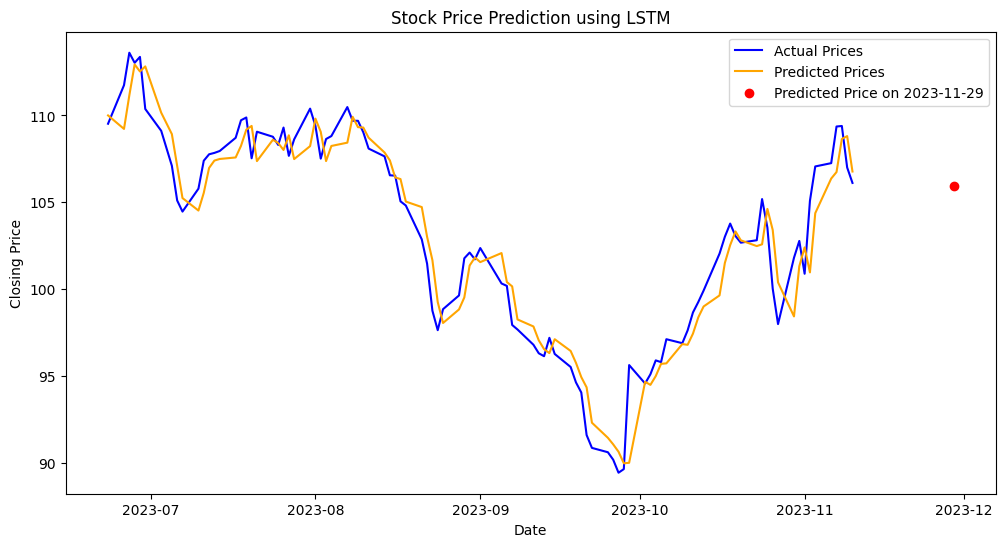

In [84]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(predictions):], actual_prices, label='Actual Prices', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', color='orange')
plt.scatter(['2023-11-29'], [predicted_price], color='red', label='Predicted Price on 2023-11-29')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [85]:
print(f'Predicted Stock Price on 2023-11-29: ${predicted_price:.2f}')


Predicted Stock Price on 2023-11-29: $105.92
